# **Problem Statement:** UnEmployment Analysis Of **US** & **India**

## **Description:**

* **The unemployment condition in the world is improving, but there are still many challenges. The global unemployment rate in 2022 was 5.77%, down from 6.5% in 2020. This is largely due to the economic recovery from the COVID-19 pandemic. However, there are still significant disparities in unemployment rates between countries and regions. For example, the unemployment rate in Africa is 12.2%, while the unemployment rate in Europe is 6.7%.**

* **There are a number of factors that contribute to unemployment, including economic recessions, technological change, and globalization. Economic recessions can lead to job losses as businesses cut back on production. Technological change can lead to job losses as machines replace workers. Globalization can lead to job losses as companies move production to countries with lower labor costs.**

Machine learning can be used to analyze unemployment data in a variety of ways. Some common applications include:

* **Predicting unemployment rates:** Machine learning models can be trained on historical unemployment data to predict future unemployment rates. This can be useful for governments, businesses, and individuals to make informed decisions about economic planning.
* **Identifying factors that contribute to unemployment:** Machine learning models can be used to identify factors that contribute to unemployment, such as changes in the economy, demographics, and education levels. This information can be used to develop policies and programs to reduce unemployment.
* **Understanding the impact of unemployment on individuals and communities:** Machine learning models can be used to understand the impact of unemployment on individuals and communities, such as the loss of income, the strain on social services, and the increase in crime. This information can be used to develop programs to help people who are unemployed.

# A: UnEmployement Analysis In **US**

Here are some details about unemployment in the US:

* The unemployment rate in the US was 3.7% in May 2023.
* This is the lowest unemployment rate since February 2020, before the COVID-19 pandemic began.
* The number of unemployed people in the US was 6.1 million in May 2023.
* This is the lowest number of unemployed people since February 2020.
* The labor force participation rate in the US was 62.3% in May 2023.
* This is the highest labor force participation rate since February 2020.
* The unemployment rate is calculated by dividing the number of unemployed 

* **people by the civilian labor force. The civilian labor force is the number of people who are employed or unemployed and are actively looking for work. The labor force participation rate is calculated by dividing the civilian labor force by the civilian noninstitutional population. The civilian noninstitutional population is the number of people who are 16 years of age or older and are not institutionalized.**

# 1.0 Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2.0 The Datasets

## 2.1 Reading Datasets

In [24]:
df=pd.read_csv("US.csv")
df.head()

Year     Month        State         County  Rate
0  2015  February  Mississippi  Newton County   6.1
1  2015  February  Mississippi  Panola County   9.4
2  2015  February  Mississippi  Monroe County   7.9
3  2015  February  Mississippi   Hinds County   6.1
4  2015  February  Mississippi  Kemper County  10.6

## Sort Summary:


* **The dataset you linked to is a CSV file containing data on unemployment rates in the United States from 1948 to 2022. The data is broken down by year, month, and state. The features in the dataset are as follows:**

* **Year:** The year in which the unemployment rate was recorded.
* **Month:** The month in which the unemployment rate was recorded.
* **State:** The state in which the unemployment rate was recorded.
* **Unemployment Rate:** The unemployment rate for the state in the given month and year.
* **County:** This feature is a categorical variable that indicates the county in which the data point is located. 

* **The unemployment rate is calculated as the number of unemployed people divided by the number of people in the labor force. The labor force is the total number of people who are either employed or unemployed.**

# 3.0 Data Exploration

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [26]:
df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

In [27]:
df['Year'].unique()

array([2015, 2014, 2016, 2011, 2010, 2013, 2012, 1991, 1990, 1993, 1992,
       1995, 1994, 1997, 1996, 1999, 1998, 2002, 2003, 2000, 2001, 2006,
       2007, 2004, 2005, 2008, 2009])

In [28]:
df['State'].unique()

array(['Mississippi', 'Oklahoma', 'Delaware', 'Minnesota', 'Illinois',
       'Arkansas', 'New Mexico', 'Indiana', 'Maryland', 'Louisiana',
       'Idaho', 'Wyoming', 'Tennessee', 'Arizona', 'Iowa', 'Kansas',
       'Utah', 'Virginia', 'Oregon', 'Connecticut', 'Montana',
       'California', 'Massachusetts', 'West Virginia', 'South Carolina',
       'New Hampshire', 'Wisconsin', 'Vermont', 'North Dakota',
       'Pennsylvania', 'Kentucky', 'Hawaii', 'Nebraska', 'Missouri',
       'Ohio', 'Alabama', 'Rhode Island', 'South Dakota', 'Colorado',
       'New Jersey', 'Washington', 'North Carolina', 'New York', 'Texas',
       'Nevada', 'Maine', 'Michigan'], dtype=object)

## 3.1 Handling Null value

In [29]:
df.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

<AxesSubplot: >

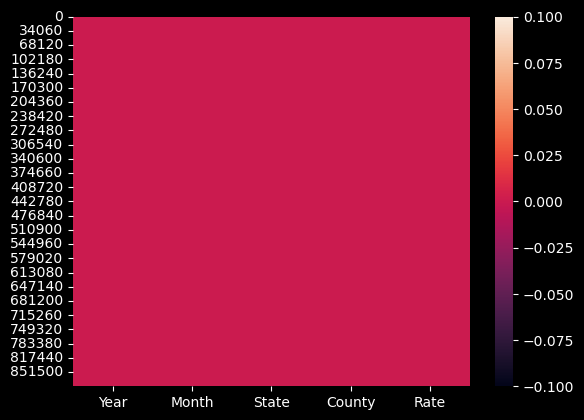

In [30]:
plt.style.use('dark_background')
sns.heatmap(df.isnull())

* **No null value is present**

# 4.0 Data Visualization

* **Let's check which state have highest data**

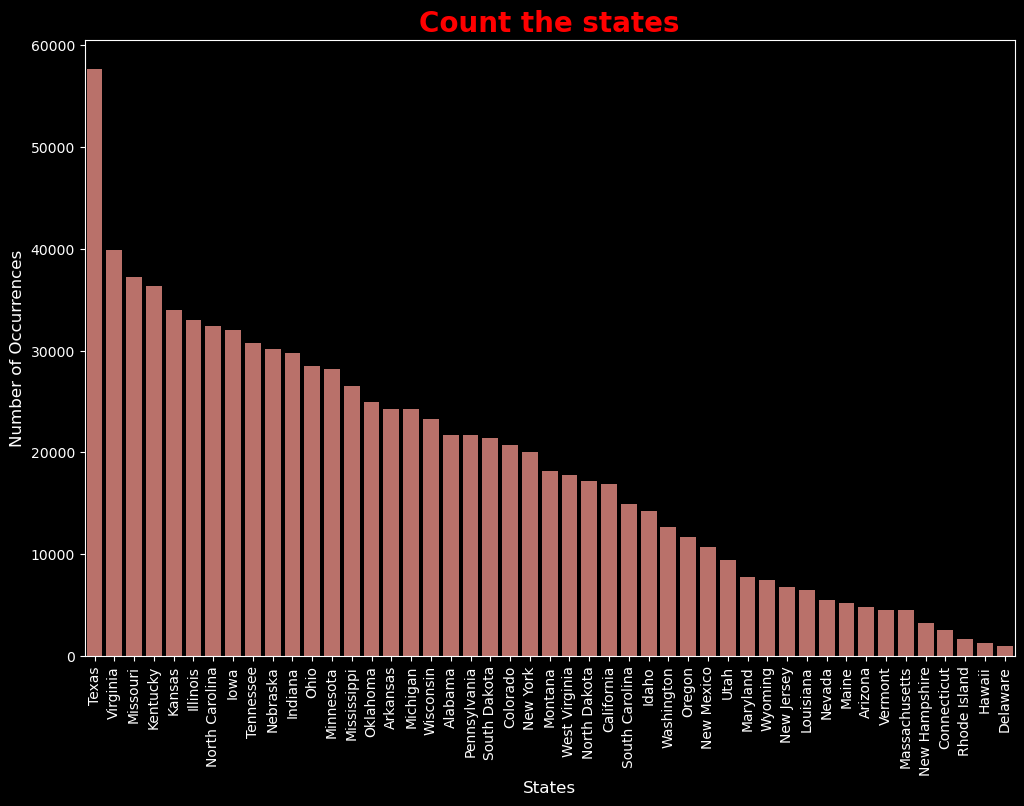

In [31]:
#Which state has the most data
color = sns.color_palette()
count = df.State.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(data=df,x=count.index, y=count.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=20,weight='bold',color='red')
plt.xticks(rotation='vertical')
plt.show()

* Let's draw mean rate 

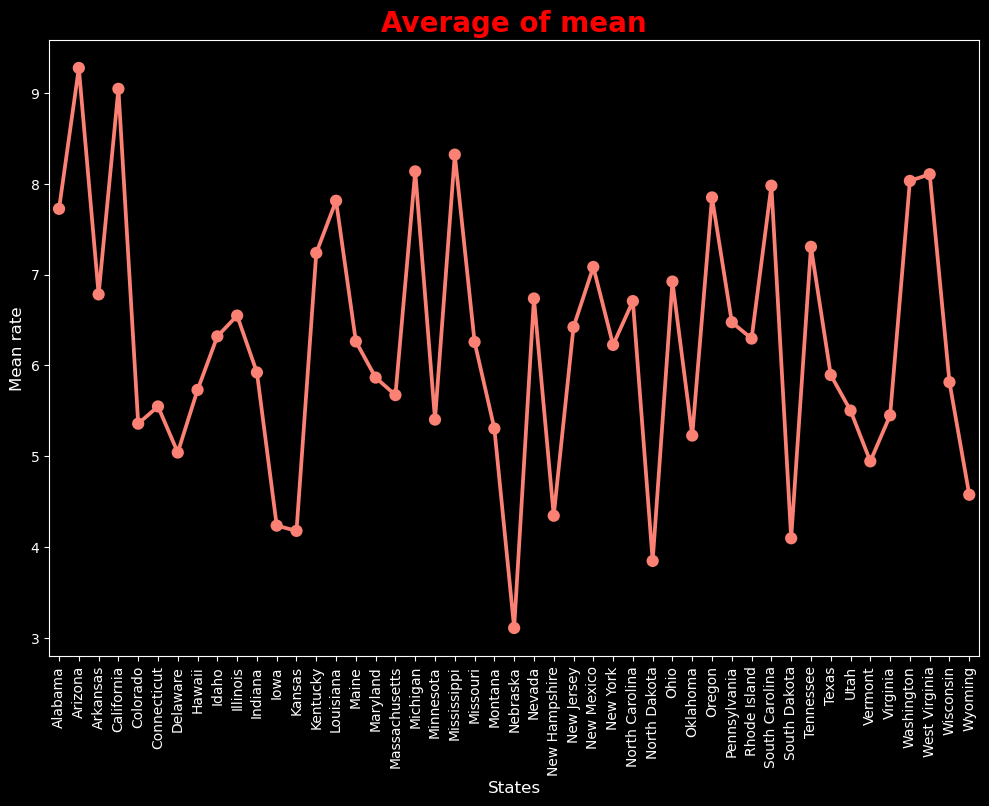

In [32]:
# take the mean of rate state by state
grouped_df = df.groupby(["State"])["Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(data=df,x=grouped_df['State'].values, y=grouped_df['Rate'].values,  color=color[3])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=20,weight='bold',color='red')
plt.xticks(rotation='vertical')
plt.show()


In [33]:
total=df.pivot_table("Rate",index=['State'],aggfunc='mean')
top_state=total.sort_values(by='Rate',ascending=False)
print(top_state)

                    Rate
State                   
Arizona         9.274588
California      9.045005
Mississippi     8.320517
Michigan        8.136136
West Virginia   8.104809
Washington      8.031513
South Carolina  7.978737
Oregon          7.849271
Louisiana       7.812949
Alabama         7.723844
Tennessee       7.305776
Kentucky        7.238306
New Mexico      7.083895
Ohio            6.923390
Arkansas        6.782210
Nevada          6.737019
North Carolina  6.708099
Illinois        6.548596
Pennsylvania    6.475843
New Jersey      6.422105
Idaho           6.319992
Rhode Island    6.295802
Maine           6.263985
Missouri        6.258425
New York        6.226225
Indiana         5.922725
Texas           5.894519
Maryland        5.866422
Wisconsin       5.815659
Hawaii          5.730401
Massachusetts   5.673611
Connecticut     5.548534
Utah            5.503076
Virginia        5.450772
Minnesota       5.403750
Colorado        5.358946
Montana         5.305418
Oklahoma        5.228062


* So Arizona has highest unemployment rate

In [34]:
df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

* Unemplyment rate by years

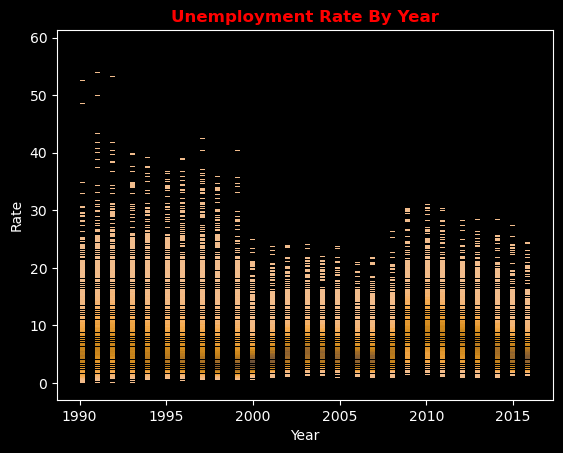

In [35]:
plt.title("Unemployment Rate By Year",weight='bold',color='red')
sns.histplot(data=df,x=df['Year'],y=df['Rate'],color=color[5])
plt.show()

In [36]:
import plotly.express as px
unemploy=df[['County','State','Rate']]
figure = px.sunburst(unemploy, path=["County", "State"], 
                     values="Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in US")
figure.show()

# B: UnEmployment Analysis In **India**

* **Unemployment in India is a major social issue. According to the Centre for Monitoring Indian Economy (CMIE), the unemployment rate in India was 7.45% in February 2023. This means that out of every 100 people in the workforce, 7.45 were unemployed. The unemployment rate is higher in urban areas (7.93%) than in rural areas (7.23%).**

There are a number of factors that contribute to unemployment in India. These include:

* **Rapid population growth:** India has a population of over 1.3 billion people, and the population is growing at a rate of 1.2% per year. This means that there is a large number of people entering the workforce every year, but not enough jobs to accommodate them all.
* **Lack of education and skills:** Many people in India do not have the education or skills that are required for the jobs that are available. This is a major barrier to employment, especially for young people.
* **Gender discrimination:** Women are more likely to be unemployed than men in India. This is due to a number of factors, including social and cultural norms, lack of access to education and training, and discrimination in the workplace.
* **Unfavorable economic conditions:** The Indian economy has been growing at a slower pace in recent years. This has led to job losses in some sectors, and has made it more difficult for people to find new jobs.


# 1. The Datasets

## 1.1 Reading Datasets

In [8]:
df2=pd.read_csv("India.csv")
df2.head()

Unnamed: 0          Region         Date  Frequency  \
0           0  Andhra Pradesh   31-01-2020          M   
1           1  Andhra Pradesh   29-02-2020          M   
2           2  Andhra Pradesh   31-03-2020          M   
3           3  Andhra Pradesh   30-04-2020          M   
4           4  Andhra Pradesh   31-05-2020          M   

    Estimated Unemployment Rate (%)   Estimated Employed  \
0                              5.48             16635535   
1                              5.83             16545652   
2                              5.79             15881197   
3                             20.51             11336911   
4                             17.43             12988845   

    Estimated Labour Participation Rate (%) Region.1  longitude  latitude  
0                                     41.02    South    15.9129     79.74  
1                                     40.90    South    15.9129     79.74  
2                                     39.18    South    15.9129     79.74  
3                                     33.10    South    15.9129     79.74  
4                                     36.46    South    15.9129     79.74

## 1.2 Datsets Summary:

The dataset you provided is a CSV file that contains data on unemployment in India. The file has the following columns:

* **State:** The name of the state in India.
* **Year:** The year for which the data is reported.
* **Unemployment Rate:** The unemployment rate for the state in the given year.
* **Population:** The population of the state in the given year.
* **Labor Force:** The number of people in the labor force in the state in the given year.
* **Unemployed:** The number of people who are unemployed in the state in the given year.

* **The data in the file can be used to understand the unemployment situation in India. For example, we can see that the unemployment rate in India has been increasing in recent years. We can also see that the unemployment rate is higher in some states than others. This data can be used to inform policy decisions about how to address the issue of unemployment in India.**

# 2.0 Data Exploration

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                267 non-null    int64  
 1   Region                                    267 non-null    object 
 2   Date                                      267 non-null    object 
 3    Frequency                                267 non-null    object 
 4    Estimated Unemployment Rate (%)          267 non-null    float64
 5    Estimated Employed                       267 non-null    int64  
 6    Estimated Labour Participation Rate (%)  267 non-null    float64
 7   Region.1                                  267 non-null    object 
 8   longitude                                 267 non-null    float64
 9   latitude                                  267 non-null    float64
dtypes: float64(4), int64(2), object(4)
mem

In [10]:
df2.describe()

Unnamed: 0   Estimated Unemployment Rate (%)   Estimated Employed  \
count  267.000000                        267.000000         2.670000e+02   
mean   133.000000                         12.236929         1.396211e+07   
std     77.220464                         10.803283         1.336632e+07   
min      0.000000                          0.500000         1.175420e+05   
25%     66.500000                          4.845000         2.838930e+06   
50%    133.000000                          9.650000         9.732417e+06   
75%    199.500000                         16.755000         2.187869e+07   
max    266.000000                         75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44.055000   27.278400   85.279900  
max                                   69.690000   33.778200   92.937600

## 2.1 Handling Null Value

In [11]:
df2.isnull().sum()

Unnamed: 0                                  0
Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

<AxesSubplot: >

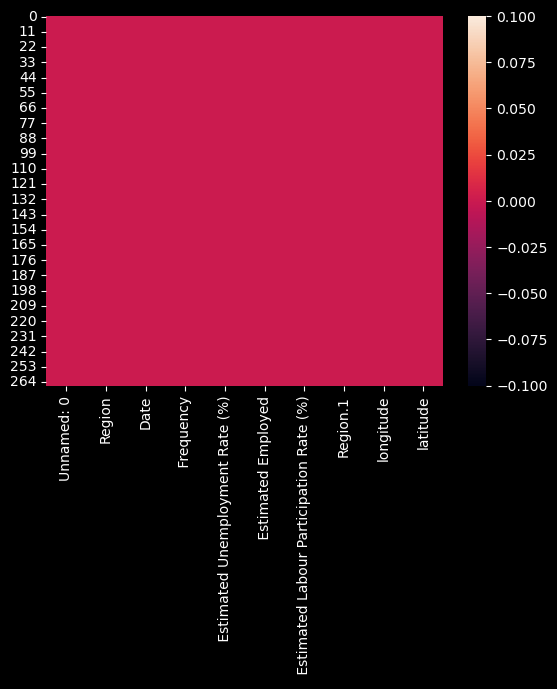

In [16]:
plt.style.use('dark_background')
sns.heatmap(df2.isnull())

* No Null value is present

* First check Feature

In [17]:
df2.columns

Index(['Unnamed: 0', 'Region', 'Date', ' Frequency',
       ' Estimated Unemployment Rate (%)', ' Estimated Employed',
       ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude',
       'latitude'],
      dtype='object')

* **Look feature name is not proper**

In [21]:
df2.columns= ['Unnamed: 0',"States","Date","Frequency",
               "Estimated_Unemployment_Rate",
               "Estimated_Employed",
               "Estimated_Labour_Participation_Rate",
               "Region","longitude","latitude"]

# 3.0 Data Visualization

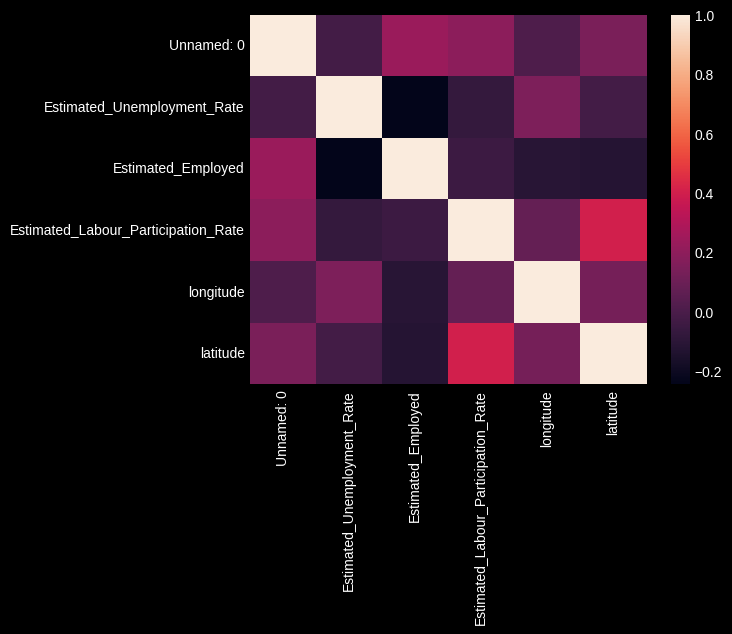

In [25]:
plt.style.use('dark_background')
sns.heatmap(df2.corr())
plt.show()

* Let's visualize number of employee in india with respect to Region

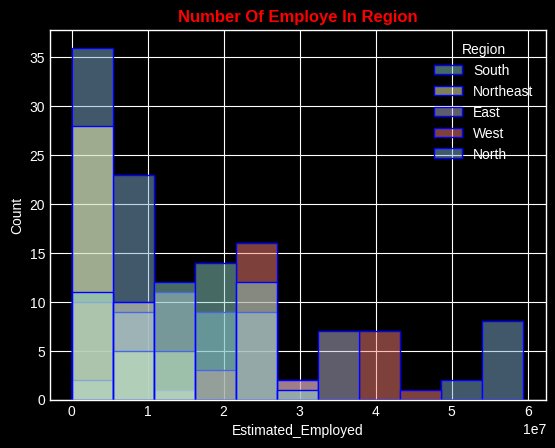

In [28]:
plt.title("Number Of Employe In Region",weight='bold',color='red')
sns.histplot(data=df2,x=df2['Estimated_Employed'],hue=df2['Region'],edgecolor='blue')
plt.show()

* Now Let's check UnEmployment Rate w.r.t Region

In [32]:
import plotly.express as px
unemploment = df2[["States", "Region", "Estimated_Unemployment_Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"], 
                     values="Estimated_Unemployment_Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [34]:
df2.columns

Index(['Unnamed: 0', 'States', 'Date', 'Frequency',
       'Estimated_Unemployment_Rate', 'Estimated_Employed',
       'Estimated_Labour_Participation_Rate', 'Region', 'longitude',
       'latitude'],
      dtype='object')

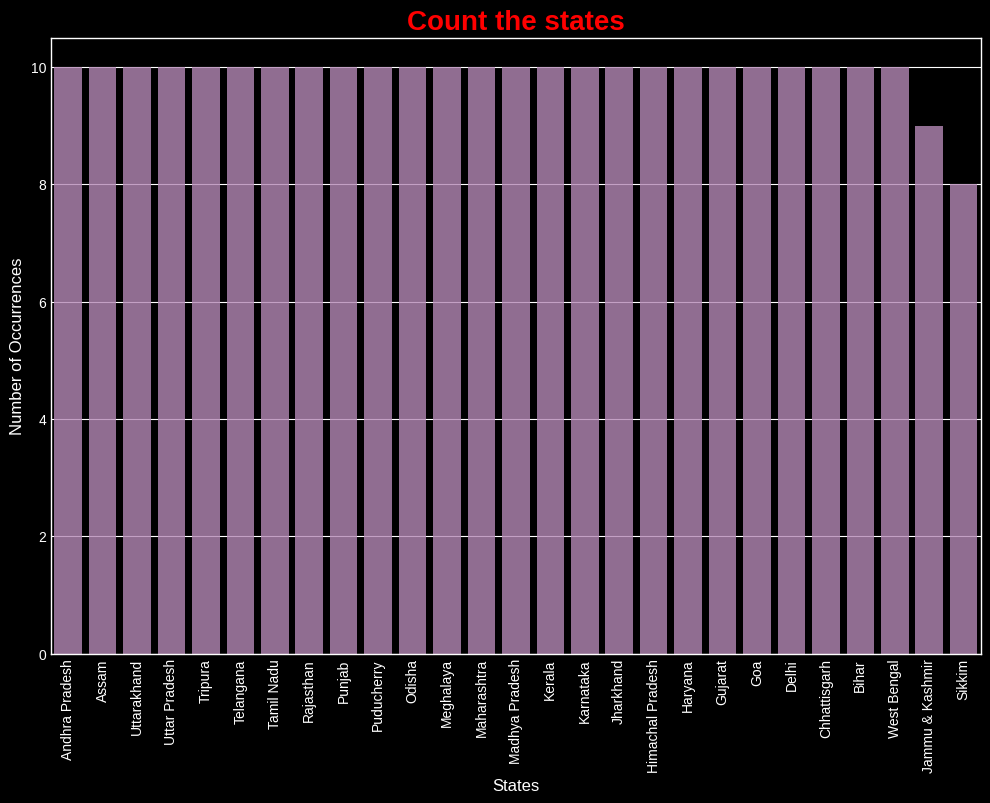

In [37]:
#Which state has the most data
color = sns.color_palette()
count = df2.States.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(data=df2,x=count.index, y=count.values, alpha=0.8, color=color[7])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=20,weight='bold',color='red')
plt.xticks(rotation='vertical')
plt.show()

* Compare India V/s India , I have no word to say somtething!

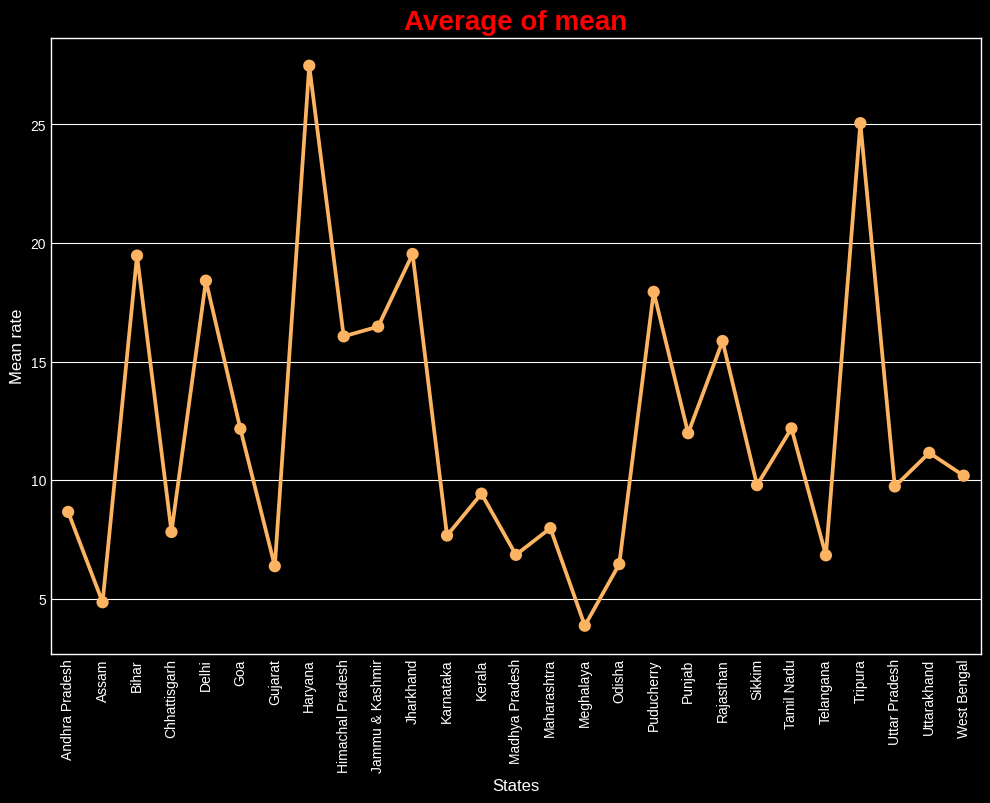

In [39]:
# take the mean of rate state by state
grouped_df = df2.groupby(["States"])["Estimated_Unemployment_Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(data=df2,x=grouped_df['States'].values, y=grouped_df['Estimated_Unemployment_Rate'].values,  color=color[5])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=20,weight='bold',color='red')
plt.xticks(rotation='vertical')
plt.show()


* Look After Haryana we come that is UTTAR PRADESH

* Let's check numeric rate

In [40]:
total=df2.pivot_table("Estimated_Unemployment_Rate",index=['States'],aggfunc='mean')
top_state=total.sort_values(by='Estimated_Unemployment_Rate',ascending=False)
print(top_state)

                  Estimated_Unemployment_Rate
States                                       
Haryana                             27.477000
Tripura                             25.055000
Jharkhand                           19.539000
Bihar                               19.471000
Delhi                               18.414000
Puducherry                          17.942000
Jammu & Kashmir                     16.477778
Himachal Pradesh                    16.065000
Rajasthan                           15.868000
Tamil Nadu                          12.187000
Goa                                 12.167000
Punjab                              11.981000
Uttarakhand                         11.156000
West Bengal                         10.192000
Sikkim                               9.792500
Uttar Pradesh                        9.737000
Kerala                               9.434000
Andhra Pradesh                       8.664000
Maharashtra                          7.979000
Chhattisgarh                      

* Again Haryana is Topper

In [41]:
df2['Date']

0       31-01-2020
1       29-02-2020
2       31-03-2020
3       30-04-2020
4       31-05-2020
          ...     
262     30-06-2020
263     31-07-2020
264     31-08-2020
265     30-09-2020
266     31-10-2020
Name: Date, Length: 267, dtype: object

* **Thank You** 